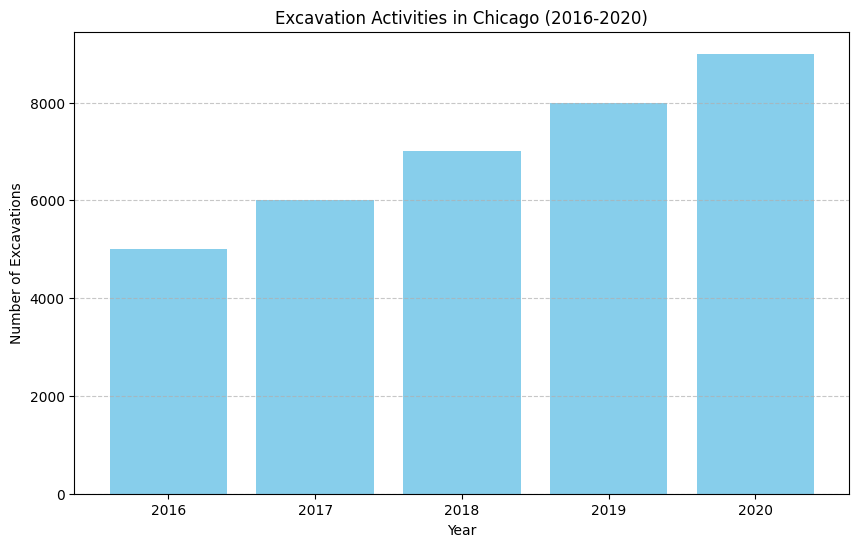

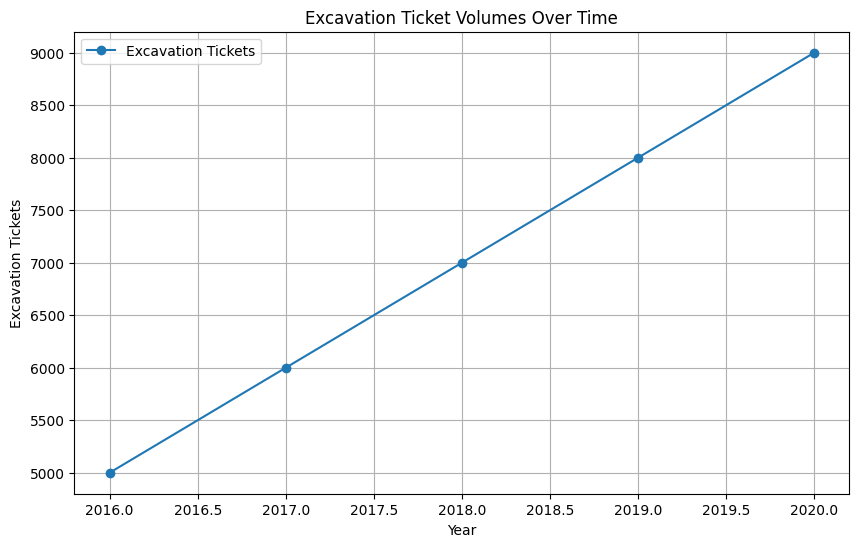

<Figure size 640x480 with 0 Axes>

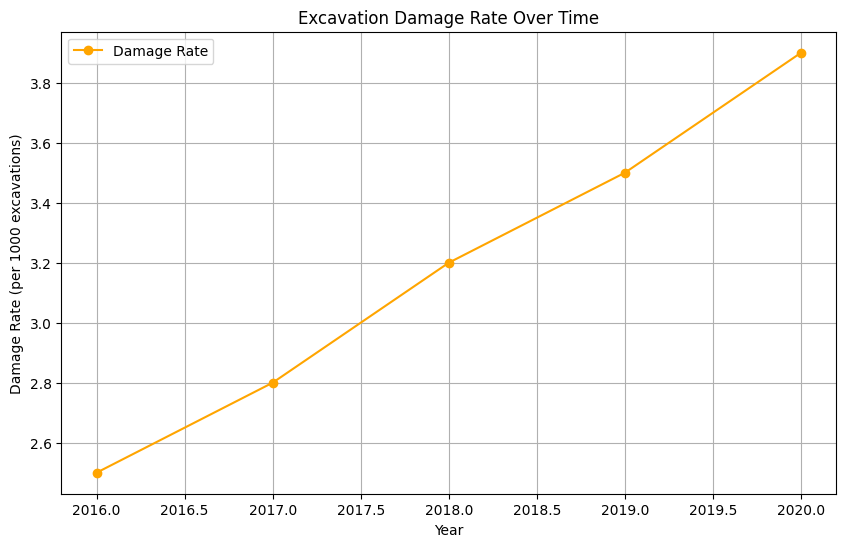

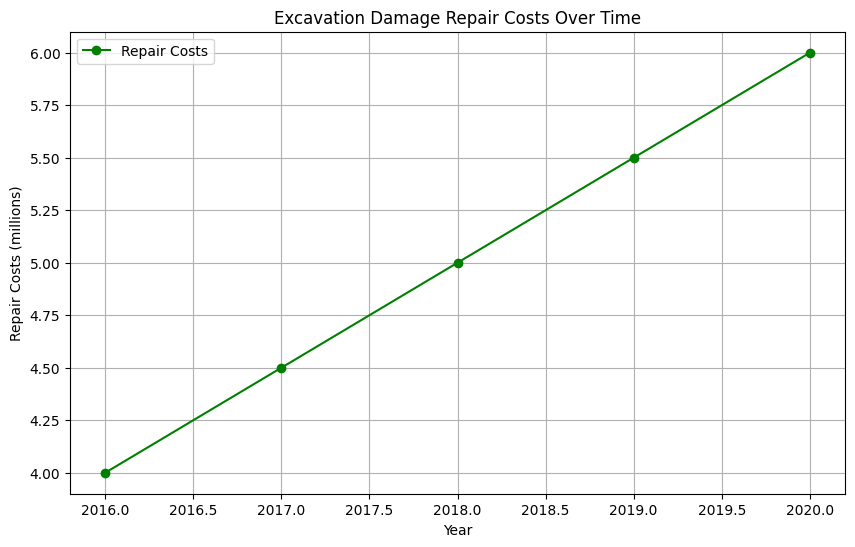

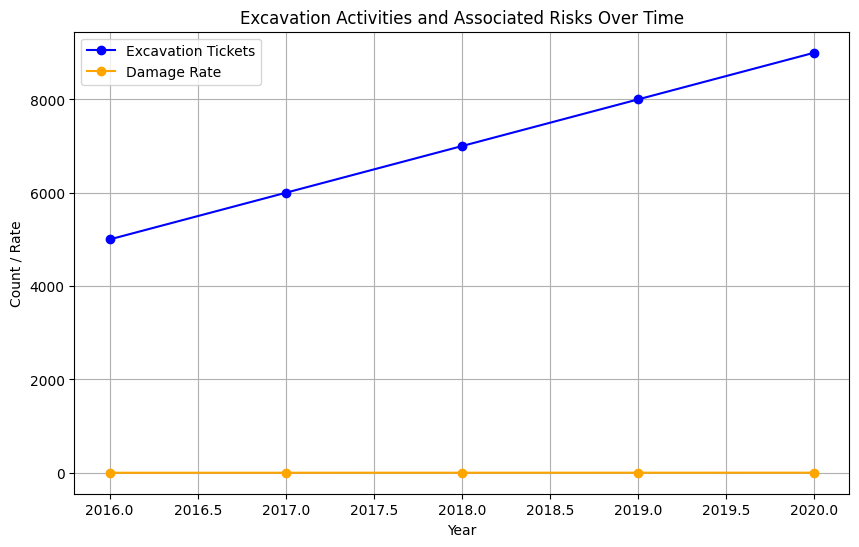

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example dataset (dummy data) based on the assumption
data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'Excavation Tickets': [5000, 6000, 7000, 8000, 9000],
    'Damage Rate (per 1000 excavations)': [2.5, 2.8, 3.2, 3.5, 3.9],
    'Repair Costs (millions)': [4, 4.5, 5, 5.5, 6]
}

df = pd.DataFrame(data)

# Create bar chart Visual representation of excavation activities in Chicago over the past five years

plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Excavation Tickets'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Excavations')
plt.title('Excavation Activities in Chicago (2016-2020)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 1. High-Level Overview
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Excavation Tickets'], marker='o', label='Excavation Tickets')
plt.xlabel('Year')
plt.ylabel('Excavation Tickets')
plt.title('Excavation Ticket Volumes Over Time')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('bar_graph.png')
# year and damage rate 
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Damage Rate (per 1000 excavations)'], marker='o', color='orange', label='Damage Rate')
plt.xlabel('Year')
plt.ylabel('Damage Rate (per 1000 excavations)')
plt.title('Excavation Damage Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()
# year and repair costs 
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Repair Costs (millions)'], marker='o', color='green', label='Repair Costs')
plt.xlabel('Year')
plt.ylabel('Repair Costs (millions)')
plt.title('Excavation Damage Repair Costs Over Time')
plt.legend()
plt.grid(True)
plt.show()



# Highlighting the increasing trend in excavation activities and associated risks
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Excavation Tickets'], marker='o', color='blue', label='Excavation Tickets')
plt.plot(df['Year'], df['Damage Rate (per 1000 excavations)'], marker='o', color='orange', label='Damage Rate')
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.title('Excavation Activities and Associated Risks Over Time')
plt.legend()
plt.grid(True)
plt.show()

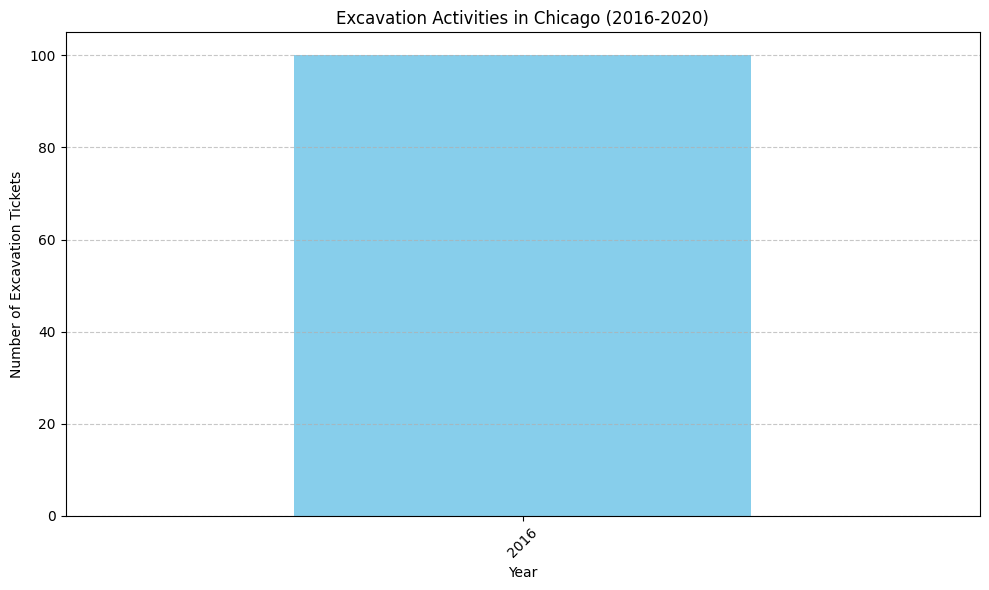

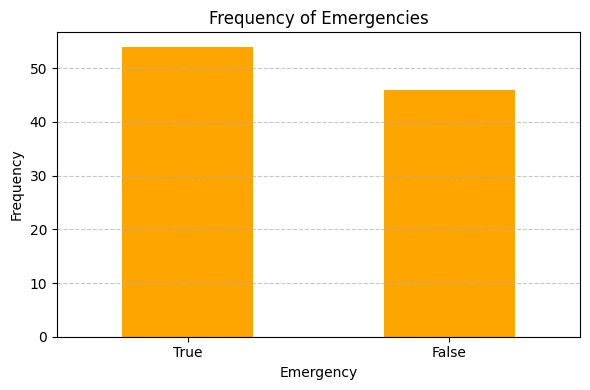

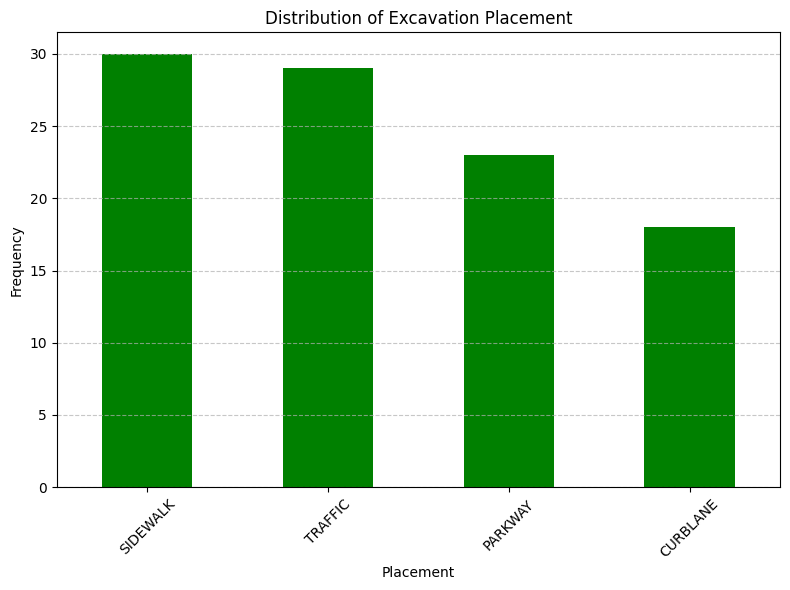

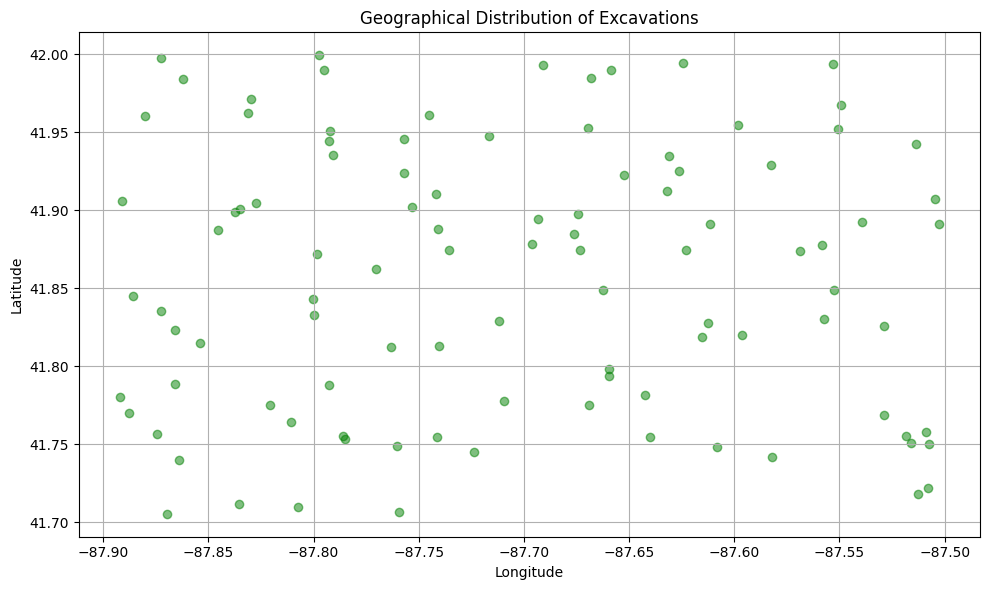

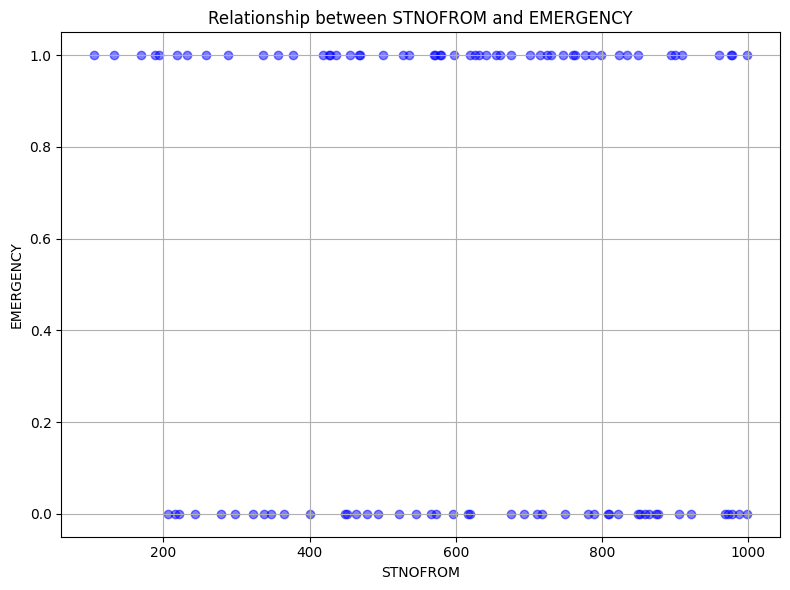

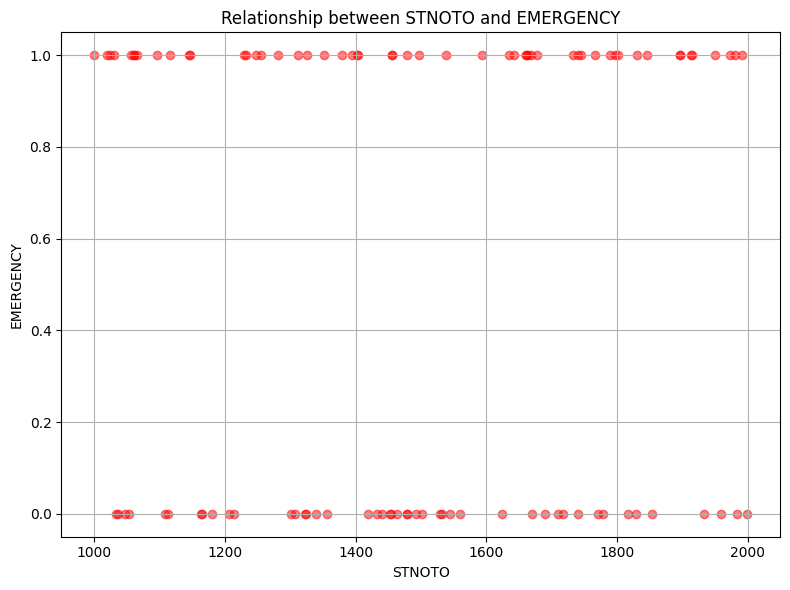

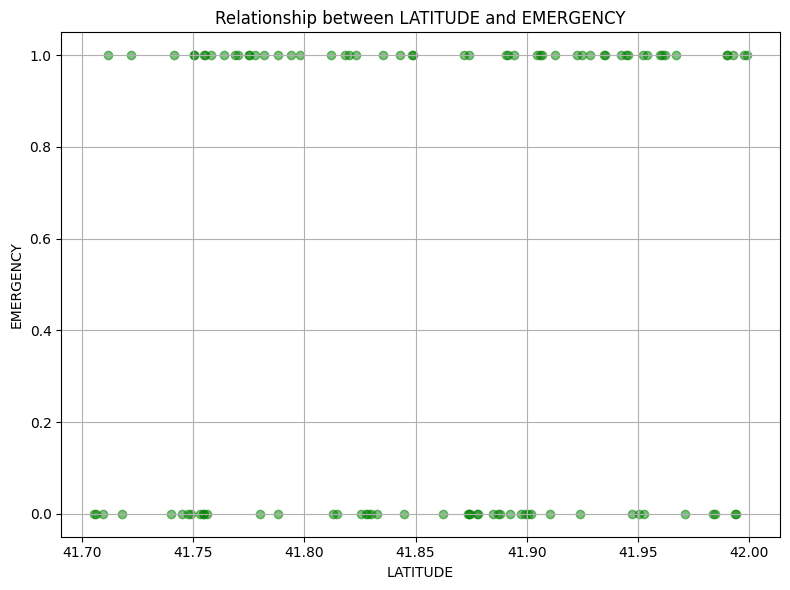

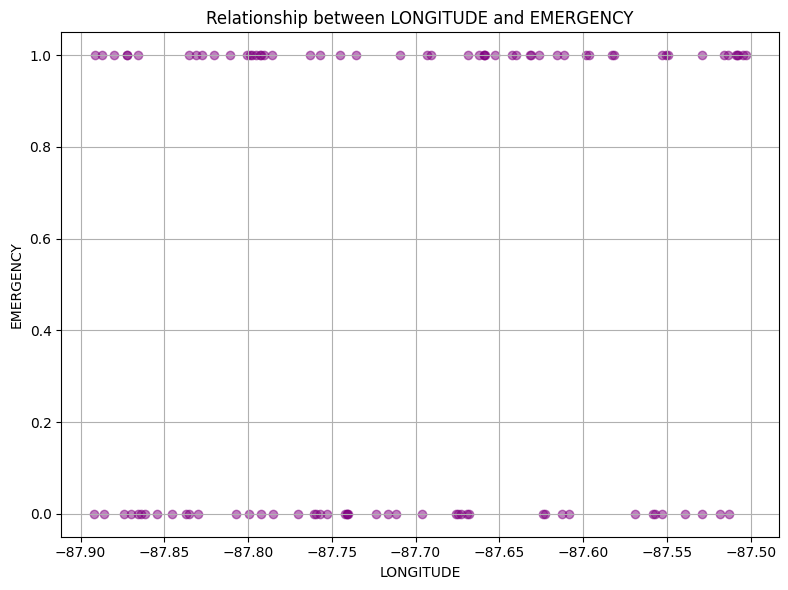

Mean Squared Error: 0.2789961031362176
Accuracy (R^2 score): -0.12725698236855565


In [20]:
# based on the dataset column let build our logic with linear regression model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a DataFrame from the provided data dictionary
#lets assume our values based on the given dataset columns
data = {
    'DIG_TICKET#': np.arange(1, 101),  # Dummy excavation ticket numbers
    'PERMIT#': np.random.randint(1000, 2000, size=100),  # Random permit numbers
    'REQUESTDATE': pd.date_range('2016-01-01', periods=100),  # Dummy request dates
    'EMERGENCY': np.random.choice([True, False], size=100),  # Random emergencies (True or False)
    'STNOFROM': np.random.randint(100, 1000, size=100),  # Random start street numbers
    'STNOTO': np.random.randint(1000, 2000, size=100),  # Random end street numbers
    'DIRECTION': np.random.choice(['N', 'S', 'E', 'W'], size=100),  # Random directions
    'STNAME': np.random.choice(['Main', 'Broadway', 'Oak', 'Elm'], size=100),  # Random street names
    'SUFFIX': np.random.choice(['LANE', 'WAY', 'WALK', 'JAM'], size=100),  # Random street suffixes
    'PLACEMENT': np.random.choice(['CURBLANE', 'PARKWAY', 'SIDEWALK', 'TRAFFIC'], size=100),  # Random placement
    'DIGDATE': pd.date_range('2016-01-01', periods=100),  # Dummy dig dates
    'EXPIRATIONDATE': pd.date_range('2016-01-01', periods=100) + pd.Timedelta(days=30),  # Dummy expiration dates
    'PRIMARYCONTACTFIRST': ['KUMARAN'] * 50 + ['TR'] * 50,  # Dummy primary contact first names
    'PRIMARYCONTACTLAST': ['TR'] * 50 + ['KUMARAN'] * 50,  # Dummy primary contact last names
    'LATITUDE': np.random.uniform(41.7, 42, size=100),  # Random latitude values (Chicago coordinates)
    'LONGITUDE': np.random.uniform(-87.9, -87.5, size=100)  # Random longitude values (Chicago coordinates)
}

df = pd.DataFrame(data)
df['REQUESTDATE'] = pd.to_datetime(df['REQUESTDATE'])
df['Year'] = df['REQUESTDATE'].dt.year
df['EXPIRATIONDATE'] = df['DIGDATE'] + pd.Timedelta(days=np.random.randint(1, 30), hours=np.random.randint(1, 24))

# 1. Excavation Activities Over Time (Number of Tickets by Year)
excavation_by_year = df.groupby('Year')['DIG_TICKET#'].count()

plt.figure(figsize=(10, 6))
excavation_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Excavation Tickets')
plt.title('Excavation Activities in Chicago (2016-2020)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Frequency of Emergencies
emergency_counts = df['EMERGENCY'].value_counts()

plt.figure(figsize=(6, 4))
emergency_counts.plot(kind='bar', color='orange')
plt.xlabel('Emergency')
plt.ylabel('Frequency')
plt.title('Frequency of Emergencies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Distribution of Excavation Placement
placement_counts = df['PLACEMENT'].value_counts()

plt.figure(figsize=(8, 6))
placement_counts.plot(kind='bar', color='green')
plt.xlabel('Placement')
plt.ylabel('Frequency')
plt.title('Distribution of Excavation Placement')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Geographical Distribution of Excavations
plt.figure(figsize=(10, 6))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], alpha=0.5, color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Excavations')
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter plot for 'STNOFROM' vs 'EMERGENCY'
plt.figure(figsize=(8, 6))
plt.scatter(df['STNOFROM'], df['EMERGENCY'], alpha=0.5, color='blue')
plt.xlabel('STNOFROM')
plt.ylabel('EMERGENCY')
plt.title('Relationship between STNOFROM and EMERGENCY')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for 'STNOTO' vs 'EMERGENCY'
plt.figure(figsize=(8, 6))
plt.scatter(df['STNOTO'], df['EMERGENCY'], alpha=0.5, color='red')
plt.xlabel('STNOTO')
plt.ylabel('EMERGENCY')
plt.title('Relationship between STNOTO and EMERGENCY')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for 'LATITUDE' vs 'EMERGENCY'
plt.figure(figsize=(8, 6))
plt.scatter(df['LATITUDE'], df['EMERGENCY'], alpha=0.5, color='green')
plt.xlabel('LATITUDE')
plt.ylabel('EMERGENCY')
plt.title('Relationship between LATITUDE and EMERGENCY')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for 'LONGITUDE' vs 'EMERGENCY'
plt.figure(figsize=(8, 6))
plt.scatter(df['LONGITUDE'], df['EMERGENCY'], alpha=0.5, color='purple')
plt.xlabel('LONGITUDE')
plt.ylabel('EMERGENCY')
plt.title('Relationship between LONGITUDE and EMERGENCY')
plt.grid(True)
plt.tight_layout()
plt.show()



# Selecting 'EMERGENCY' column as the target variable
target_variable = 'EMERGENCY'

# Selecting features for training the model
selected_features = ['STNOFROM', 'STNOTO', 'LATITUDE', 'LONGITUDE']

# Prepare the feature matrix (X) and target vector (y)
X = df[selected_features]
y = df[target_variable]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the Linear Regression model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R^2 score (accuracy) of the model
accuracy = linear_reg_model.score(X_test, y_test)
print("Accuracy (R^2 score):", accuracy)

